<b>Exploratory Data Analysis / Basic Statistics</b>

In [7]:
import spacy
spacy_nlp = spacy.load("en_core_web_sm")
import utility_functions as utils
import importlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
importlib.reload(utils)

<module 'utility_functions' from '/Users/abelboros/Documents/Personal/Thesis/PopMusicInformationRetrieval/utility_functions.py'>

In [3]:
df = pd.read_pickle('./Data/dataframes/preprocessed_df.pkl')

<b>Tempo</b>

In [9]:
average_tempo_by_coast_year = df.groupby(['Release Year', 'Coast'])['Tempo1'].mean().reset_index()
overall_mean_tempo = df.groupby('Release Year')['Tempo1'].mean().reset_index()
overall_mean_tempo.rename(columns={'Tempo1': 'Overall Average Tempo'}, inplace=True)

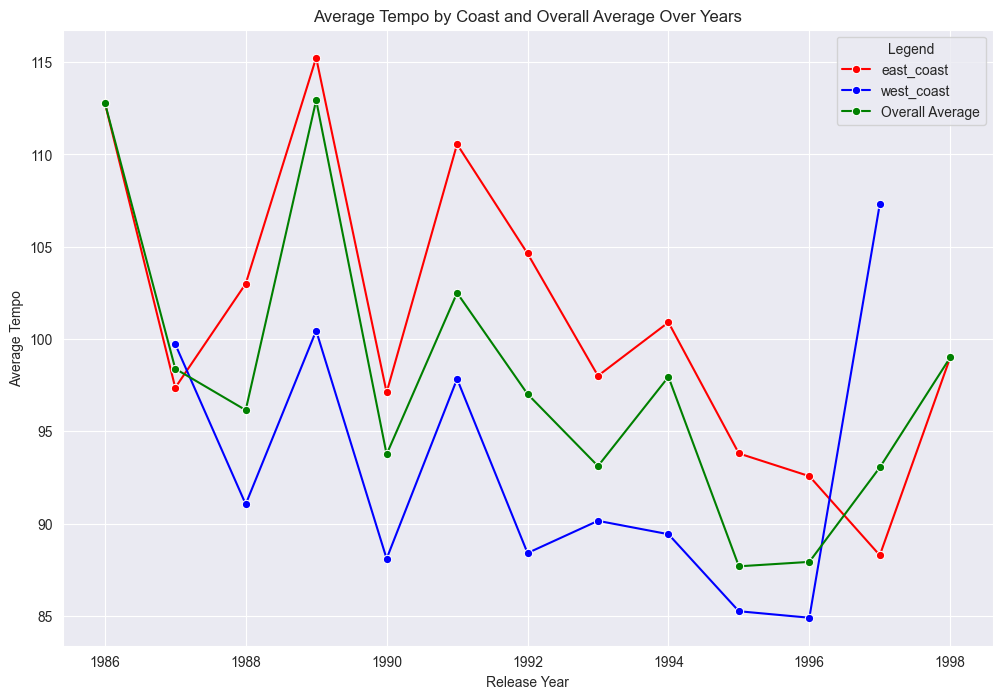

In [10]:
plt.figure(figsize=(12, 8))

# Plot the average tempo by coast
sns.lineplot(data=average_tempo_by_coast_year, x='Release Year', y='Tempo1', hue='Coast', palette={'east_coast': 'red', 'west_coast': 'blue'}, marker='o')

# Plot the overall average tempo per year
sns.lineplot(data=overall_mean_tempo, x='Release Year', y='Overall Average Tempo', color='green', marker='o', label='Overall Average')

plt.title('Average Tempo by Coast and Overall Average Over Years')
plt.xlabel('Release Year')
plt.ylabel('Average Tempo')
plt.legend(title='Legend')
plt.grid(True)
plt.savefig('coast_topic_contribution_with_overall.png', dpi=300, bbox_inches='tight')
plt.show()